In [1]:
import sqc
import numpy as np
from exercises import cqft, qft, CRz, cadd, add, SWAP, CSWAP, C2NOT, phaseEstimate
import matplotlib.pyplot as plt

# If $y<c$

In [2]:
def smallerThan(c,t,xbits,a,op): 
    # performs NOT operation on t qubit if x<c, a is ancilla qubit |0>
    pbits=xbits + [a]
    N=len(pbits)
    op=add(2**N - c,op,pbits)
    op=op.CNOT(a,t)
    op=add(c,op,pbits)
    return op

In [3]:
def pr(i,start,width):
    return (i//2**start)%(2**width)

st=sqc.state(6,basis = ["|%d>|%d>|%d>" % (pr(i,0,4),pr(i,4,1),pr(i,5,1)) 
                        for i in range(2**6)])

In [4]:
st=sqc.operator(6).X(0).X(2)*st
par_xbits=[0,1,2,3]
par_tbit=5
par_abit=4
print(st)

   1 * |5>|0>|0>


In [5]:
for c in range(2**4):
    st2=smallerThan(c,par_tbit,par_xbits,par_abit,sqc.operator(6))*st
    print("|x>|0>|(x < %d)> =\n" % c,st2)

|x>|0>|(x < 0)> =
    1 * |5>|0>|0>
|x>|0>|(x < 1)> =
    1 * |5>|0>|0>
|x>|0>|(x < 2)> =
    1 * |5>|0>|0>
|x>|0>|(x < 3)> =
    1 * |5>|0>|0>
|x>|0>|(x < 4)> =
    1 * |5>|0>|0>
|x>|0>|(x < 5)> =
    1 * |5>|0>|0>
|x>|0>|(x < 6)> =
    1 * |5>|0>|1>
|x>|0>|(x < 7)> =
    1 * |5>|0>|1>
|x>|0>|(x < 8)> =
    1 * |5>|0>|1>
|x>|0>|(x < 9)> =
    1 * |5>|0>|1>
|x>|0>|(x < 10)> =
    1 * |5>|0>|1>
|x>|0>|(x < 11)> =
    1 * |5>|0>|1>
|x>|0>|(x < 12)> =
    1 * |5>|0>|1>
|x>|0>|(x < 13)> =
    1 * |5>|0>|1>
|x>|0>|(x < 14)> =
    1 * |5>|0>|1>
|x>|0>|(x < 15)> =
    1 * |5>|0>|1>


# Addition modulo $n$

In [6]:
def modadd(x,op,ybits,n,abits):
    assert(len(abits)==3)
    assert(x<n)
    a=abits[0]
    c0=abits[1] # y < n
    c1=abits[2] # y < n-x
    
    op=smallerThan(n,c0,ybits,a,op)
    op=smallerThan(n-x,c1,ybits,a,op)

    # if c0 and not c1: y = y + x - n  -> 
    op=C2NOT(c0,c1,a,op.X(c1)).X(c1)
    op=cadd(a,x-n,op,ybits)
    op=C2NOT(c0,c1,a,op.X(c1)).X(c1)

    # if c0 and c1: y = y + x
    op=C2NOT(c0,c1,a,op)
    op=cadd(a,x,op,ybits)
    op=C2NOT(c0,c1,a,op)

    # untrigger c0 and c1 based on result in y
    op=smallerThan(x,c1,ybits,a,op) 
    # (x+y) % n < x   -> c1 was not set, after this c1 will be equal to c0
    op=op.CNOT(c0,c1) # clear c1
    op=smallerThan(n,c0,ybits,a,op) # clear c0
    return op

st=sqc.state(7,basis = ["|%d>|a=%d>|c0=%d>|c1=%d>" % 
                        (pr(i,0,4),pr(i,4,1),pr(i,5,1),pr(i,6,1)) for i in range(2**7)])

In [7]:
print(st)
par_ybits=[0,1,2,3]
par_abits=[4,5,6]
op=modadd(3,sqc.operator(7),par_ybits,11,par_abits)
opinc=add(1,sqc.operator(7),par_ybits)
st0=st
for y in range(2**len(par_ybits)):
    st1=op*st0
    print("(%d + 3) %% 11 = \n" % y,st1)
    st0=opinc*st0

   1 * |0>|a=0>|c0=0>|c1=0>
(0 + 3) % 11 = 
    1 * |3>|a=0>|c0=0>|c1=0>
(1 + 3) % 11 = 
    1 * |4>|a=0>|c0=0>|c1=0>
(2 + 3) % 11 = 
    1 * |5>|a=0>|c0=0>|c1=0>
(3 + 3) % 11 = 
    1 * |6>|a=0>|c0=0>|c1=0>
(4 + 3) % 11 = 
    1 * |7>|a=0>|c0=0>|c1=0>
(5 + 3) % 11 = 
    1 * |8>|a=0>|c0=0>|c1=0>
(6 + 3) % 11 = 
    1 * |9>|a=0>|c0=0>|c1=0>
(7 + 3) % 11 = 
    1 * |10>|a=0>|c0=0>|c1=0>
(8 + 3) % 11 = 
    1 * |0>|a=0>|c0=0>|c1=0>
(9 + 3) % 11 = 
    1 * |1>|a=0>|c0=0>|c1=0>
(10 + 3) % 11 = 
    1 * |2>|a=0>|c0=0>|c1=0>
(11 + 3) % 11 = 
    1 * |11>|a=0>|c0=0>|c1=0>
(12 + 3) % 11 = 
    1 * |12>|a=0>|c0=0>|c1=0>
(13 + 3) % 11 = 
    1 * |13>|a=0>|c0=0>|c1=0>
(14 + 3) % 11 = 
    1 * |14>|a=0>|c0=0>|c1=0>
(15 + 3) % 11 = 
    1 * |15>|a=0>|c0=0>|c1=0>


# Controlled addition modulo $n$

In [8]:
def csmallerThan(c0,c,t,xbits,a,op): # control bit c0
    pbits=xbits + [a]
    N=len(pbits)
    op=cadd(c0,2**N - c,op,pbits)
    op=op.CNOT(a,t)
    op=cadd(c0,c,op,pbits)
    return op

def cmodadd(c,x,op,ybits,n,abits):
    assert(len(abits)==3)
    assert(x<n)
    a=abits[0]
    c0=abits[1] # y < n
    c1=abits[2] # y < n-x
    
    op=csmallerThan(c,n,c0,ybits,a,op)
    op=csmallerThan(c,n-x,c1,ybits,a,op)

    # if c0 and not c1: y = y + x - n  -> 
    op=C2NOT(c0,c1,a,op.X(c1)).X(c1)
    op=cadd(a,x-n,op,ybits)
    op=C2NOT(c0,c1,a,op.X(c1)).X(c1)

    # if c0 and c1: y = y + x
    op=C2NOT(c0,c1,a,op)
    op=cadd(a,x,op,ybits)
    op=C2NOT(c0,c1,a,op)

    # untrigger c0 and c1 based on result in y
    op=csmallerThan(c,x,c1,ybits,a,op) 
    # (x+y) % n < x   -> c1 was not set, after this c1 will be equal to c0
    
    op=op.CNOT(c0,c1) # clear c1
    op=csmallerThan(c,n,c0,ybits,a,op) # clear c0
    return op

st=sqc.state(8,basis = ["|%d>|a=%d>|c0=%d>|c1=%d>|c=%d>" % 
                        (pr(i,0,4),pr(i,4,1),pr(i,5,1),pr(i,6,1),pr(i,7,1)) for i in range(2**8)])

In [9]:
print(st)
par_ybits=[0,1,2,3]
par_abits=[4,5,6]
par_cbit=7
op=cmodadd(par_cbit,3,sqc.operator(8),par_ybits,11,par_abits)
opinc=add(1,sqc.operator(8),par_ybits)
st0=sqc.operator(8).H(par_cbit)*st
for y in range(2**len(par_ybits)):
    st1=op*st0
    print("(%d + 3) %% 11 = \n" % y,st1)
    st0=opinc*st0

   1 * |0>|a=0>|c0=0>|c1=0>|c=0>
(0 + 3) % 11 = 
    0.707107 * |0>|a=0>|c0=0>|c1=0>|c=0>
 + 0.707107 * |3>|a=0>|c0=0>|c1=0>|c=1>
(1 + 3) % 11 = 
    0.707107 * |1>|a=0>|c0=0>|c1=0>|c=0>
 + 0.707107 * |4>|a=0>|c0=0>|c1=0>|c=1>
(2 + 3) % 11 = 
    0.707107 * |2>|a=0>|c0=0>|c1=0>|c=0>
 + 0.707107 * |5>|a=0>|c0=0>|c1=0>|c=1>
(3 + 3) % 11 = 
    0.707107 * |3>|a=0>|c0=0>|c1=0>|c=0>
 + 0.707107 * |6>|a=0>|c0=0>|c1=0>|c=1>
(4 + 3) % 11 = 
    0.707107 * |4>|a=0>|c0=0>|c1=0>|c=0>
 + 0.707107 * |7>|a=0>|c0=0>|c1=0>|c=1>
(5 + 3) % 11 = 
    0.707107 * |5>|a=0>|c0=0>|c1=0>|c=0>
 + 0.707107 * |8>|a=0>|c0=0>|c1=0>|c=1>
(6 + 3) % 11 = 
    0.707107 * |6>|a=0>|c0=0>|c1=0>|c=0>
 + 0.707107 * |9>|a=0>|c0=0>|c1=0>|c=1>
(7 + 3) % 11 = 
    0.707107 * |7>|a=0>|c0=0>|c1=0>|c=0>
 + 0.707107 * |10>|a=0>|c0=0>|c1=0>|c=1>
(8 + 3) % 11 = 
    0.707107 * |8>|a=0>|c0=0>|c1=0>|c=0>
 + 0.707107 * |0>|a=0>|c0=0>|c1=0>|c=1>
(9 + 3) % 11 = 
    0.707107 * |9>|a=0>|c0=0>|c1=0>|c=0>
 + 0.707107 * |1>|a=0>|c0=0>|c1=0>|c

# Modulo $n$ multiply accumulator

In [10]:
def bits(y,N):
    return [ (y//2**j) % 2 for j in range(N) ]

def ci(x,n,N):
    b=bits(x,N)
    return [ sum([ b[j]*2**(i+j) for j in range(N) ]) % n for i in range(N) ]

# Now mod multiply
def modmultacc(x,n,op,ybits,tbits,abits):
    assert(len(abits)==3)
    Nbits=len(ybits)
    assert(len(tbits)==len(ybits))
    c=ci(x,n,2**Nbits)
    for i in range(Nbits):
        op=cmodadd(ybits[i],c[i],op,tbits,n,abits)
    return op

par_ybits=[0,1,2]
par_tbits=[3,4,5]
par_abits=[6,7,8]

st=sqc.state(9,basis = ["|%d>|%d>|a=%d>" % 
                        (pr(i,0,3),pr(i,3,3),pr(i,6,3)) for i in range(2**9)])
st=sqc.operator(9).X(1)*st

print("Start with\n",st)

op=modmultacc(3,5,sqc.operator(9),ybits=par_ybits,tbits=par_tbits,abits=par_abits)
st=op*st
print("Mult by 3 mod 5\n",st)

Start with
    1 * |2>|0>|a=0>
Mult by 3 mod 5
    1 * |2>|1>|a=0>


In [11]:
st=op*st
print("Mult by 3 mod 5\n",st)

Mult by 3 mod 5
    1 * |2>|2>|a=0>


# Modulo $n$ multiply

In [12]:
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

def modinv(a, m): # calculate modular inverse using the greatest common divisor
    g, x, y = egcd(a, m)
    if g != 1:
        raise Exception('modular inverse does not exist')
    else:
        return x % m

In [15]:
def modmult(x,n,op,ybits,abits):
    assert(len(abits)==3+len(ybits))
    tbits=abits[:-3]
    abits=abits[-3:]
    Nbits=len(ybits)
    nix=n - modinv(x,n)
    
    op=modmultacc(x,n,op,ybits,tbits=tbits,abits=abits)
    for i in range(Nbits):
        op=SWAP(ybits[i],tbits[i],op)
        
    op=modmultacc(nix,n,op,ybits,tbits=tbits,abits=abits)
    return op

st=sqc.state(9,basis = ["|%d>|%d>|a=%d>" % 
                        (pr(i,0,3),pr(i,3,3),pr(i,6,3)) for i in range(2**9)])
st=sqc.operator(9).X(1)*st
print("Start with\n",st)

par_abits=[3,4,5,6,7,8]

op=modmult(3,5,sqc.operator(9),ybits=par_ybits,abits=par_abits)
st=op*st
print("Mult by 3 mod 5\n",st)

Start with
    1 * |2>|0>|a=0>
Mult by 3 mod 5
    1 * |1>|0>|a=0>


In [16]:
st=op*st
print("Mult by 3 mod 5\n",st)

Mult by 3 mod 5
    1 * |3>|0>|a=0>


In [17]:
st=op*st
print("Mult by 3 mod 5\n",st)

Mult by 3 mod 5
    1 * |4>|0>|a=0>


In [18]:
st=op*st
print("Mult by 3 mod 5\n",st)


Mult by 3 mod 5
    1 * |2>|0>|a=0>


# Controlled modulo $n$ multiplication

In [20]:
def cmodmultacc(x,n,op,ybits,tbits,abits,cbit):
    assert(len(abits)==4)
    
    tmpbit=abits[3]
    
    Nbits=len(ybits)
    c=ci(x,n,2**Nbits)
    for i in range(Nbits):
        op=C2NOT(ybits[i],cbit,tmpbit,op)
        op=cmodadd(tmpbit,c[i],op,tbits,n,abits[0:3])
        op=C2NOT(ybits[i],cbit,tmpbit,op)
    return op

def cmodmult(x,n,op,ybits,abits,cbit):
    assert(len(abits)==4+len(ybits))
    tbits=abits[:-4]
    abits=abits[-4:]
    Nbits=len(ybits)
    nix=n - modinv(x,n)
    
    op=cmodmultacc(x,n,op,ybits,tbits=tbits,abits=abits,cbit=cbit)
    for i in range(Nbits):
        op=CSWAP(cbit,ybits[i],tbits[i],op)
        
    op=cmodmultacc(nix,n,op,ybits,tbits=tbits,abits=abits,cbit=cbit)
    return op


par_ybits=[0,1,2]
par_abits=[3,4,5,6,7,8,9]
par_cbit=10

st=sqc.state(11,basis = ["|%d>|a=%d>|c=%d>" % 
                         (pr(i,0,3),pr(i,3,7),pr(i,10,1)) for i in range(2**11)])
st=sqc.operator(11).X(1).H(par_cbit)*st
print("Start with\n",st)

op=cmodmult(3,5,sqc.operator(11),ybits=par_ybits,abits=par_abits,cbit=par_cbit)
st=op*st
print("Mult by 3 mod 5\n",st)

Start with
    0.707107 * |2>|a=0>|c=0>
 + 0.707107 * |2>|a=0>|c=1>
Mult by 3 mod 5
    0.707107 * |2>|a=0>|c=0>
 + 0.707107 * |1>|a=0>|c=1>


In [21]:
st=op*st
print("Mult by 3 mod 5\n",st)

Mult by 3 mod 5
    0.707107 * |2>|a=0>|c=0>
 + 0.707107 * |3>|a=0>|c=1>


# Phase estimation

In [46]:
par_ybits=[0,1,2]
par_abits=[3,4,5,6,7,8,9]
par_xbits=[10,11,12,13]

st=sqc.state(14,basis = ["|%d>|a=%d>|x=%d>" % 
                         (pr(i,0,3),pr(i,3,7),pr(i,10,4)) for i in range(2**14)])
st=sqc.operator(14).X(par_ybits[0])*st
print("Initial state\n",st)
opMM=dict([ (2**j,cmodmult((3**(2**j)) % 5,5,sqc.operator(14),ybits=par_ybits,
                abits=par_abits,cbit=par_xbits[j])) for j in range(len(par_xbits)) ])

Initial state
    1 * |1>|a=0>|x=0>


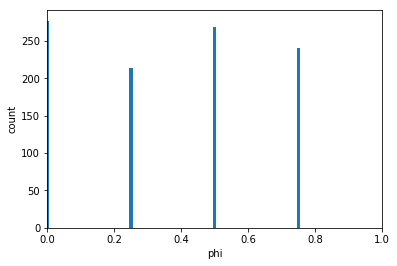

In [47]:
def cujMM(cbit,j,op):
    return op + opMM[j]

st1=phaseEstimate(sqc.operator(14),par_xbits,cujMM)*st

res=sqc.sample(st1,1000,mask=par_xbits)
        
plt.bar([ x / 2**len(par_xbits) for x in res.keys() ],res.values(),width=0.01)
plt.xlabel('phi')
plt.xlim(0,1)
plt.ylabel('count')
plt.show()

In [48]:
for x in sorted(res):
    print(x, res[x])

0 277
4 214
8 268
12 241


In [51]:
# Check
for i in range(5):
    print(i,3**i % 5)

0 1
1 3
2 4
3 2
4 1
